Script to compute and plot maps of multi-year mean annual precipitation on SAFRAN moving sub-domains

In [9]:
import sys
import os
import pickle
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from config import *
from functions import load_cum_climato
from utils import *

In [10]:
### CST ###

reg = 'Fr'
dataset = 'SAFRAN'
ymin = 1958
ymax = 2021
years = np.arange(ymin, ymax+1, 1)
per = str(ymin) + '-' + str(ymax)
sizes = [50, 60]  # 10, 20, 30, 40  # domain side length (number of pixels)
prop = 0.33  # proportion du côté de la fenêtre sans recouvrement (dans les deux directions)
th_n = 0.75  # minimum proportion of land grid cell for the sub-domain to be considered
step_yrs = 5  # 5-yr sub-periods

projmap = ccrs.LambertConformal(central_longitude=2.337229, central_latitude=46.8, false_easting=600000., false_northing=2200000.)
resol = '50m'  # use data at this scale
bodr = cfeature.NaturalEarthFeature(category='cultural', 
    name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)

In [11]:
# Get France polygon and reprojectin SAFRAN CRS
cnydbffile = SHAPEDIR + '/world-boundaries/world-administrative-boundaries.dbf'
dfcny = gpd.read_file(cnydbffile)
dffra = gpd.GeoSeries(dfcny.iloc[93]['geometry'])
dffra.set_crs(dfcny.crs, inplace=True)
dffra_reproj = dffra.to_crs(proj)

In [12]:
#~ OUTDIR

if not os.path.isdir(FIGDIR + '/for_article'):
    os.mkdir(FIGDIR + '/for_article')
figdir = FIGDIR + '/for_article'


>>> 400x400 <<<
0 0 : 
>>> 480x480 <<<
0 1 : 

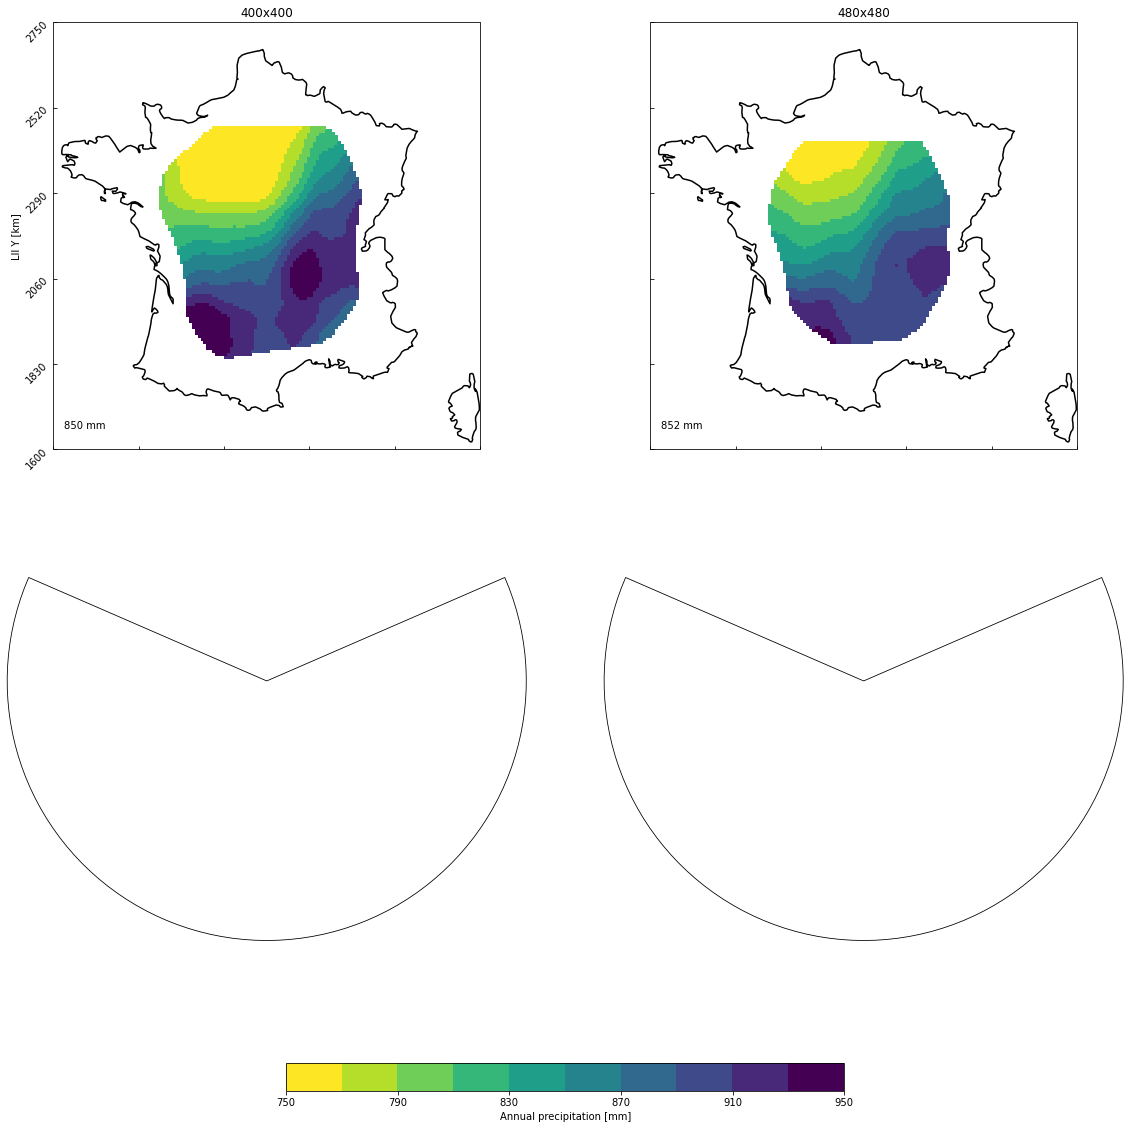

In [14]:
cmap_map = 'viridis_r'
cmap_map = plt.cm.get_cmap(cmap_map)

#ncols_map = np.arange(0, 1400+200, 200)  # int(np.nanmax(cum))
#ncols_map = [0., 400., 600., 800., 1000., 1200., 1400., 1600., 2000.]
ncols_map = np.arange(750, 950+20, 20) #[0., 400., 600., 800., 1000., 1200., 1400., 1600., 2000.]
norm_map = BoundaryNorm(ncols_map, ncolors=cmap_map.N, clip=True)

xlims = (50000., 1200000.)
ylims = (1600000., 2750000.)
xtcks = np.linspace(xlims[0], xlims[1], 6)
ytcks = np.linspace(ylims[0], ylims[1], 6)
xtlbs = [int(xt/1000) for xt in xtcks]
ytlbs = [int(yt/1000) for yt in ytcks]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20., 20.), subplot_kw={'projection': projmap})

plt.subplots_adjust(bottom=0.1, top=0.95, wspace=0.15, hspace=0.15)

i=0
j=0

for size in sizes:
    size_ = str(int(size*res/1000)) + 'x' + str(int(size*res/1000))
    print('\n>>> {0} <<<'.format(size_))

    cums = load_cum_climato(ymin, ymax, size)    
    cum_mean = cums.mean(axis=0)

    if j==ax.shape[1]:
        j=0
        i=i+1

    print(i, j, end=' : ', flush=True)

    ax_ = ax[i][j]
    #ax_ = ax[i//3, i % 3]

    p = ax_.pcolor(cum_mean.x, cum_mean.y, cum_mean, norm=norm_map, cmap=cmap_map)
    ax_.text(0.025, 0.05, '{0} mm'.format(int(round(np.nanmean(cum_mean), 0))), transform=ax_.transAxes)

    #ax_.scatter(x_center, y_center, s=10, c='r', marker='x', zorder=100)

    dffra_reproj.boundary.plot(ax=ax_, color='k')

    ax_.set_xticks(xtcks)
    ax_.set_yticks(ytcks)
    ax_.tick_params(axis='x', direction='in')
    ax_.tick_params(axis='y', direction='in')

    if j == 0:
        ax_.set_yticklabels(ytlbs, rotation=45)
        ax_.set_ylabel('LII Y [km]')
    else:
        ax_.set_yticklabels([])
    if i == ax.shape[0]-1:
        ax_.set_xticklabels(xtlbs, rotation=45)
        ax_.set_xlabel('LII X [km]')
    else:
        ax_.set_xticklabels([])

    ax_.set_xlim(xlims)
    ax_.set_ylim(ylims)

    #ax_.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)  -> add feature on subplots ???
    #ax_.coastlines()  -> pb with shapely ??? (pip3 install shapely==1.8.2 -> change to former version?)
    ax_.set_title(size_)
    j=j+1

    #sys.exit()

fig.colorbar(p, ax=ax[:ax.shape[0]], orientation='horizontal', label='Annual precipitation [mm]', shrink=0.5, pad=0.1)


#~ Save

figfile = figdir + '/fig2.png'
fig.savefig(figfile, dpi=300)

In [12]:
ncols_map

array([750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950])